In [48]:
import igraph
import numpy as np
import json
import random
import pickle
import matplotlib.pyplot as plt

In [49]:
skip1 = 0
data = {}
for line in open("san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv"):
    csv_row = line.split(',')
    if (skip1 == 1):
        if (csv_row[2] == '12'):
            #print (csv_row[0], csv_row[1], csv_row[3])
            k1 = int (csv_row[0])
            k2 = int(csv_row[1])
            if (k1 <= k2):
                key = (k1, k2)
            else:
                key = (k2, k1)
            if (not (key in data.keys())):
                data[key] = []
            data[key].append(float(csv_row[3]))                
    skip1 = 1
    
#['sourceid,dstid,month,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time']

In [50]:
print (len(data))

321713


In [51]:
data_tup  = []
for k in data.keys():
    mean_wt = np.mean(data[k])
    data_tup.append((k[0],k[1], mean_wt))
    
#data_np = np.array(data_np)

In [52]:
len(data_tup)

321713

In [53]:
G = igraph.Graph.TupleList(data_tup, directed=False, weights=True)
print (G.summary())
print ("Number of Edges:    " , len(G.get_edgelist()))

IGRAPH UNW- 1905 321713 -- 
+ attr: name (v), weight (e)
Number of Edges:     321713


In [54]:
g_cluster = G.clusters()
print  (g_cluster.subgraph(0).summary())
print  (g_cluster.subgraph(1).summary())
print  (g_cluster.subgraph(2).summary())

IGRAPH UNW- 1898 321703 -- 
+ attr: name (v), weight (e)
IGRAPH UNW- 5 9 -- 
+ attr: name (v), weight (e)
IGRAPH UNW- 2 1 -- 
+ attr: name (v), weight (e)


In [55]:
g = g_cluster.giant()
print (g.summary())
print ("Number of Edges:    " , len(g.get_edgelist()))

IGRAPH UNW- 1898 321703 -- 
+ attr: name (v), weight (e)
Number of Edges:     321703


In [56]:
# Question 6
# Number of Edges = 321703
# Number of Vertices = 1898

In [57]:
with open('san_francisco_censustracts.json', 'r') as infile:  
    geo_data_j = json.load(infile)

In [58]:
vert_feat = {}
for i in range(len(geo_data_j['features'])):
    feat_i = geo_data_j['features'][i]
    m_id = feat_i['properties']['MOVEMENT_ID']
    disp_name = feat_i['properties']['DISPLAY_NAME']
    coors = np.mean(np.array(feat_i['geometry']['coordinates'][0][0]), axis = 0)
    vert_feat[int(m_id)] = (disp_name, coors.tolist())
    #print (m_id, disp_name, coors)

In [59]:
n_v = len(g.vs)
print ("Number of vertices: ", n_v)

for i in range(len(g.vs)):
    ind = g.vs[i]['name']
    g.vs[i]['disp_name'] = vert_feat[ind][0]
    g.vs[i]['coors'] = vert_feat[ind][1]

Number of vertices:  1898


In [60]:
mst = g.spanning_tree()
print (mst.summary())

mst_edges = mst.get_edgelist()[:5]
print(mst_edges)

IGRAPH UNW- 1898 1897 -- 
+ attr: coors (v), disp_name (v), name (v), weight (e)
[(0, 1), (2, 3), (18, 19), (56, 57), (283, 284)]


In [61]:
for (e1,e2) in mst_edges:
    print (g.vs[e1]['disp_name'],'\n', g.vs[e2]['disp_name'])
    print (g.vs[e1]['coors'])
    print (g.vs[e2]['coors'])
    print (g.es[g.get_edgelist().index((e1,e2))]['weight']/60.0)
    print ('\n\n')

2100 Fieldcrest Avenue, Fairfield 
 100 Monte Verde Drive, Vacaville
[-122.05216156249999, 38.292827187500016]
[-122.00124636111111, 38.352439888888895]
5.115666666666667



1000 Neilson Street, Albany 
 800 40th Street, Longfellow, Oakland
[-122.28737978260868, 37.88701856521739]
[-122.27357263157893, 37.83122173684211]
17.152166666666666



600 San Bruno Avenue East, San Bruno 
 3700 Rhoda Drive, West San Jose, San Jose
[-122.40644822222224, 37.62803318518518]
[-121.97476406249999, 37.30359775]
45.82191666666667



700 Lakeville Circle, Petaluma 
 7700 Lakeville Highway, Petaluma
[-122.59061477777777, 38.2394685]
[-122.54534531698114, 38.218784641509465]
3.7675



16300 Castello Knolls Drive, Prunedale 
 800 East Laurel Drive, Salinas
[-121.74466116504854, 36.744977980582526]
[-121.62191814705884, 36.69384788235294]
15.563083333333333





In [62]:
edge_list = np.copy(g.get_edgelist())
random.shuffle(edge_list)

In [63]:
vertices = []
#sorted_edges = []
for (e1, e2) in edge_list:
    if (not (e1 in vertices)):
        vertices.append(e1)
    if (not (e2 in vertices)):
        vertices.append(e2)
#     if (e1 > e2):
#         t = e1
#         e1 = e2
#         e2 = e1
#     sorted_edges.append((e1,e2))

In [64]:
len(vertices)

1895

In [271]:
def get_triangles(edge_list):
    triangles = []
    count = 0

    for (v1,v2) in edge_list:
        for v in vertices:
            if (count%100 == 0):
                print (count)
            if (count == 1000):
                return triangles
            if ((((v, v1) in edge_list) or ((v1, v) in edge_list)) and (((v, v2) in edge_list) or ((v2, v) in edge_list)) and (v != v1) and (v != v2)):
                count = count + 1
                triangles.append((v, v1, v2))

In [ ]:
triangles = get_triangles(edge_list)

In [ ]:
f = open("triangles.txt", "wb")
pickle.dump(triangles, f)

In [65]:
f = open("triangles.txt", "rb")
triangles2 = pickle.load(f)

In [66]:
edge_list = g.get_edgelist()
count = 0
for (v1,v2,v3) in triangles2:
    try:
        i1 = edge_list.index((v1,v2))
    except:
        i1 = edge_list.index((v2,v1))
        
    try:
        i2 = edge_list.index((v2,v3))
    except:
        i2 = edge_list.index((v3,v2))
        
    try:
        i3 = edge_list.index((v3,v1))
    except:
        i3 = edge_list.index((v1,v3))
        
    w1 = g.es[i1]['weight']
    w2 = g.es[i2]['weight']
    w3 = g.es[i3]['weight']
    
    if (((w1+w2) >= w3) and ((w2+w3) > w1) and ((w3+w1) > w2)):
        count = count + 1
        
print (count/10.0, "% of the triangles satisfy the triangle inequality.")

92.8 % of the triangles satisfy the triangle inequality.


In [67]:
# Apply the 1-approximate algorithm

In [69]:
mst_double_edges = []
mst_edgelist = mst.get_edgelist()
for i in range(len(mst_edgelist)):
    wt = mst.es[i]['weight']
    (v1, v2) = mst_edgelist[i]
    mst_double_edges.append((mst.vs[v1]['name'], mst.vs[v2]['name'], wt))
    mst_double_edges.append((mst.vs[v1]['name'], mst.vs[v2]['name'], wt))
    
print (len(mst_edgelist))
print (len(mst_double_edges))

1897
3794


In [70]:
# Create two copies of each edge in MST
mst_d = igraph.Graph.TupleList(mst_double_edges, directed=False, weights=True)

In [71]:
# g_edges = [(1,2,1),(1,3,1),(2,3,1),(1,4,1), (4,5,1), (5,3,1), (1,6,1), (6,7,1), (7,8,1)]
# mst_edges = [(1,2,1),(1,3,1),(1,4,1),(5,3,1),(1,2,1),(1,3,1),(1,4,1),(5,3,1), (1,6,1), (6,7,1), (7,8,1)]
# g = igraph.Graph.TupleList(g_edges, directed=False, weights=True)
# mst_d = igraph.Graph.TupleList(mst_edges, directed=False, weights=True)

# print (g.get_edgelist())
# print (mst_d.get_edgelist())

In [72]:
n_v = len(mst_d.vs)
print ("Number of vertices in MST Double  : ", n_v)
print ("Number of edges in MST Double     : ", len(mst_d.es))
print ("Number of edges in MST            : ", len(mst.es))

for i in range(len(mst_d.vs)):
    ind = mst_d.vs[i]['name']
    mst_d.vs[i]['disp_name'] = vert_feat[ind][0]
    mst_d.vs[i]['coors'] = vert_feat[ind][1]

Number of vertices in MST Double  :  1898
Number of edges in MST Double     :  3794
Number of edges in MST            :  1897


In [96]:
# Find a eulerian walk of that
count = 0
n_v = len(mst_d.vs)
mst_d_edgelist = mst_d.get_edgelist()
path = []
curr = mst_d_edgelist[0][0]
start = curr
vertices = [curr]
edges_remaining = list.copy(mst_d_edgelist)

In [97]:
count = 1
curr_n = -1
while (count < n_v):
    for (v1,v2) in edges_remaining:
        if ((v1 == curr and (not (v2 in vertices))) or (v2 == curr and (not (v1 in vertices)))):
#             if (count%10 == 0):
#                 print (count, '/', n_v)
            edges_remaining.remove((v1,v2))
            path.append((v1,v2))
            if (v1 == curr):
                if (not (v2 in vertices)):
                    vertices.append(v2)
                    count += 1
                curr_n = v2
            if (v2 == curr):
                if (not (v1 in vertices)):
                    vertices.append(v1)
                    count += 1
                curr_n = v1
            break
    if (curr == curr_n):
        for (v1,v2) in edges_remaining:
            if ((v1 == curr) or (v2 == curr)):
#                 if (count%10 == 0):
#                     print (count, '/', n_v)
                edges_remaining.remove((v1,v2))
                path.append((v1,v2))
                if (v1 == curr):
                    if (not (v2 in vertices)):
                        vertices.append(v2)
                        count += 1
                    curr_n = v2
                if (v2 == curr):
                    if (not (v1 in vertices)):
                        vertices.append(v1)
                        count += 1
                    curr_n = v1
                break
    if (curr == curr_n):
        print ("Error Condition")
    curr = curr_n

print (curr, start)

for (v1,v2) in edges_remaining:
        if (v1 == curr and v2 == start):
            edges_remaining.remove((v1,v2))
            path.append((v1,v2))
            vertices.append(start)
        if (v1 == start and v2 == curr):
            edges_remaining.remove((v1,v2))
            path.append((v1,v2))
            vertices.append(start)


1895 0


In [98]:
def convert_vertex_index(vertices, g, mst):
    vertices_n = []
    for v in vertices:
        n = mst.vs[v]['name']
        for i in range(len(g.vs)):
            if (n == g.vs[i]['name']):
                vertices_n.append(i)
    return vertices_n


def convert_path_index(path, g, mst):
    path_n = []
    for (v1, v2) in path:
        n1 = mst.vs[v1]['name']
        n2 = mst.vs[v2]['name']
        ind1 = -1
        ind2 = -1
        for i in range(len(g.vs)):
            if (n1 == g.vs[i]['name']):
                ind1 = i
            if (n2 == g.vs[i]['name']):
                ind2 = i
        path_n.append((ind1, ind2))
    return path_n

In [99]:
vertices_g = convert_vertex_index(vertices, g, mst_d)
path_g = convert_path_index(path, g, mst_d)

In [100]:
first_mentions = {}
for v in vertices_g:
    for i in range(len(path_g)):
        (e1,e2) = path_g[i]
        if (e1 == v or e2 == v):
            first_mentions[v] = i
            break

In [113]:
path_trimmed = []
cost = 0.0
vertices_visited = []

g_edgelist = g.get_edgelist()

for i in range(0, len(vertices)-1):
    v = vertices[i]
    n_v = vertices[i+1]
    
    v_g = vertices_g[i]
    n_v_g = vertices_g[i+1]
    
    if (not (n_v_g in vertices_visited)):    
        if ((v,n_v) in mst_d_edgelist):
            #print ("Direct edge from mst: ", v, n_v)
            path_trimmed.append((v_g,n_v_g))
            cost += mst_d.es[mst_d_edgelist.index((v,n_v))]['weight']
        elif ((n_v,v) in mst_d_edgelist):
            #print ("Direct edge from mst: ", n_v, v)
            path_trimmed.append((n_v_g,v_g))
            cost += mst_d.es[mst_d_edgelist.index((n_v,v))]['weight']
        elif ((v_g,n_v_g) in g_edgelist):
            #print ("Direct edge from g: ", v_g, n_v_g)
            path_trimmed.append((v_g,n_v_g))
            cost += g.es[g_edgelist.index((v_g,n_v_g))]['weight']
        elif ((n_v_g,v_g) in g_edgelist):
            #print ("Direct edge from g: ", n_v_g, v_g)
            path_trimmed.append((n_v_g,v_g))
            cost += g.es[g_edgelist.index((n_v_g,v_g))]['weight']
#         else:
#             e_list = g.get_shortest_paths(v_g, to=n_v_g, weights='weight', output="epath")
#             v_list = g.get_shortest_paths(v_g, to=n_v_g, weights='weight', output="vpath")
#             for e in e_list[0]:
#                 path_trimmed.append(g_edgelist[e])
#                 cost += g.es[e]['weight']
#             for v in v_list:
#                 vertices_visited.append(v)
        else:
            for i in range(first_mentions[v_g]+1, first_mentions[n_v_g]+1):
                if (path_g[i] in g_edgelist):
                    path_trimmed.append(path_g[i])
                    cost += g.es[g_edgelist.index(path_g[i])]['weight']
                else:
                    opp_e = (path_g[i][1], path_g[i][0])
                    path_trimmed.append(opp_e)
                    cost += g.es[g_edgelist.index(opp_e)]['weight']
        vertices_visited.append(v_g)
        vertices_visited.append(n_v_g)



            
print ("Cost of Approx. TSP = ", cost)

Cost of Approx. TSP =  6217331.2450000085


In [116]:
# With Shortest Path Addition
path_trimmed_sp = []
cost_sp = 0.0
vertices_visited = []

g_edgelist = g.get_edgelist()

for i in range(0, len(vertices)-1):
    v = vertices[i]
    n_v = vertices[i+1]
    
    v_g = vertices_g[i]
    n_v_g = vertices_g[i+1]
    
    if (not (n_v_g in vertices_visited)):    
        if ((v,n_v) in mst_d_edgelist):
            #print ("Direct edge from mst: ", v, n_v)
            path_trimmed_sp.append((v_g,n_v_g))
            cost_sp += mst_d.es[mst_d_edgelist.index((v,n_v))]['weight']
        elif ((n_v,v) in mst_d_edgelist):
            #print ("Direct edge from mst: ", n_v, v)
            path_trimmed_sp.append((n_v_g,v_g))
            cost_sp += mst_d.es[mst_d_edgelist.index((n_v,v))]['weight']
        elif ((v_g,n_v_g) in g_edgelist):
            #print ("Direct edge from g: ", v_g, n_v_g)
            path_trimmed_sp.append((v_g,n_v_g))
            cost_sp += g.es[g_edgelist.index((v_g,n_v_g))]['weight']
        elif ((n_v_g,v_g) in g_edgelist):
            #print ("Direct edge from g: ", n_v_g, v_g)
            path_trimmed_sp.append((n_v_g,v_g))
            cost_sp += g.es[g_edgelist.index((n_v_g,v_g))]['weight']
        else:
            e_list = g.get_shortest_paths(v_g, to=n_v_g, weights='weight', output="epath")
            v_list = g.get_shortest_paths(v_g, to=n_v_g, weights='weight', output="vpath")
            for e in e_list[0]:
                path_trimmed_sp.append(g_edgelist[e])
                cost_sp += g.es[e]['weight']
            for v in v_list:
                vertices_visited.append(v)
#         else:
#             for i in range(first_mentions[v_g]+1, first_mentions[n_v_g]+1):
#                 if (path_g[i] in g_edgelist):
#                     path_trimmed.append(path_g[i])
#                     cost += g.es[g_edgelist.index(path_g[i])]['weight']
#                 else:
#                     opp_e = (path_g[i][1], path_g[i][0])
#                     path_trimmed.append(opp_e)
#                     cost += g.es[g_edgelist.index(opp_e)]['weight']
                    
        vertices_visited.append(v_g)
        vertices_visited.append(n_v_g)



            
print ("Cost of Approx. TSP = ", cost_sp)

Cost of Approx. TSP =  4279629.125000013


In [117]:
print(len(path), len(path_trimmed) ,len(path_trimmed_sp))

3794 3088 6422


In [120]:
# Path Cost
cost_path = 0.0
for e in path:
    cost_path += mst_d.es[mst_d.get_edgelist().index(e)]['weight']
    
print ('Cost of Path                  : ', cost_path)
print ('Cost of Path Trimmed          : ', cost)
print ('Cost of Path Trimmed with SP  : ', cost_sp)

Cost of Path                  :  7989557.300000014
Cost of Path Trimmed          :  6217331.2450000085
Cost of Path Trimmed with SP  :  4279629.125000013


In [121]:
# Find an upper bound on the empirical performance of the approximate algorithm:
# rho = Approximate TSP Cost/Optimal TSP Cost

In [122]:
path_vertices = [path_trimmed[0][0]]
for (v1, v2) in path_trimmed:
    if (not (v2 in path_vertices)):
        path_vertices.append(v2)

In [123]:
for v in path_vertices[:10]:
    print(g.vs[v]['disp_name'])

2100 Fieldcrest Avenue, Fairfield
100 Monte Verde Drive, Vacaville
0 Travis Avenue, Travis Air Force Base, Fairfield
2700 San Luis Court, Southwestern Sacramento, Sacramento
1300 East Beamer Street, Woodland
Jeep Trail Usgs, Brooks
5200 Riverside Boulevard, Southwestern Sacramento, Sacramento
5200 East Commerce Way, North Sacramento, Sacramento
1600 Tamarack Lane, Central Davis, Davis
Bryte Bend Road, Sacramento


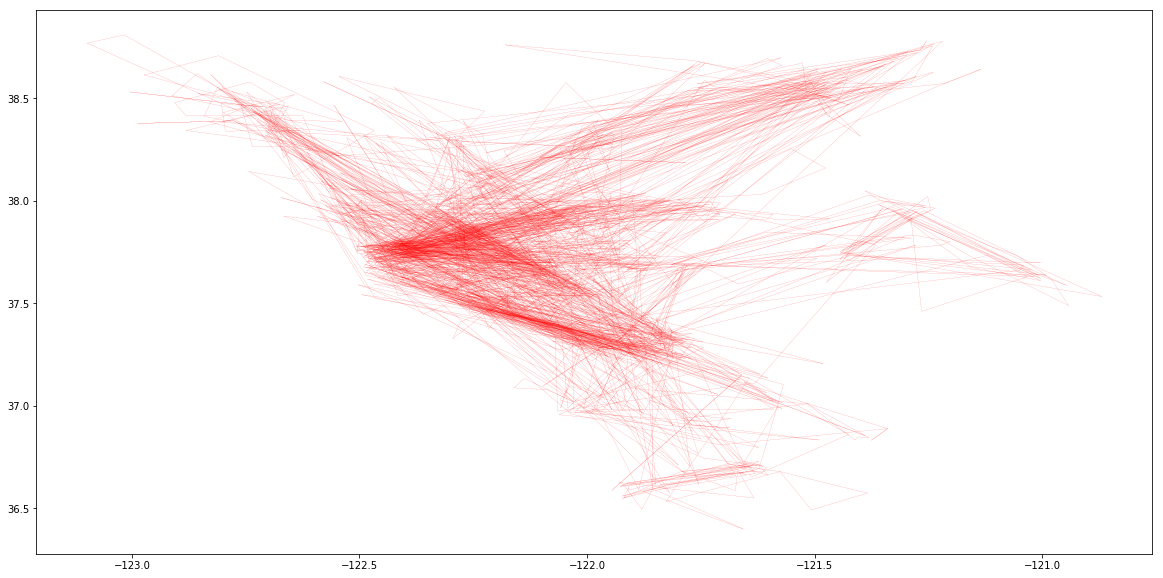

In [124]:
# Plot the trajectory that Santa has to travel!

x = [g.vs[path_trimmed[0][0]]['coors'][0]]
y = [g.vs[path_trimmed[0][0]]['coors'][1]]

for (v1,v2) in path_trimmed:
    x.append(g.vs[v2]['coors'][0])
    y.append(g.vs[v2]['coors'][1])

plt.figure(figsize=(20,10))
for i in range(0,len(x)-1):
    plt.plot(x[i:i+2],y[i:i+2], 'ro-', linewidth=0.1, ms=0)

plt.show()

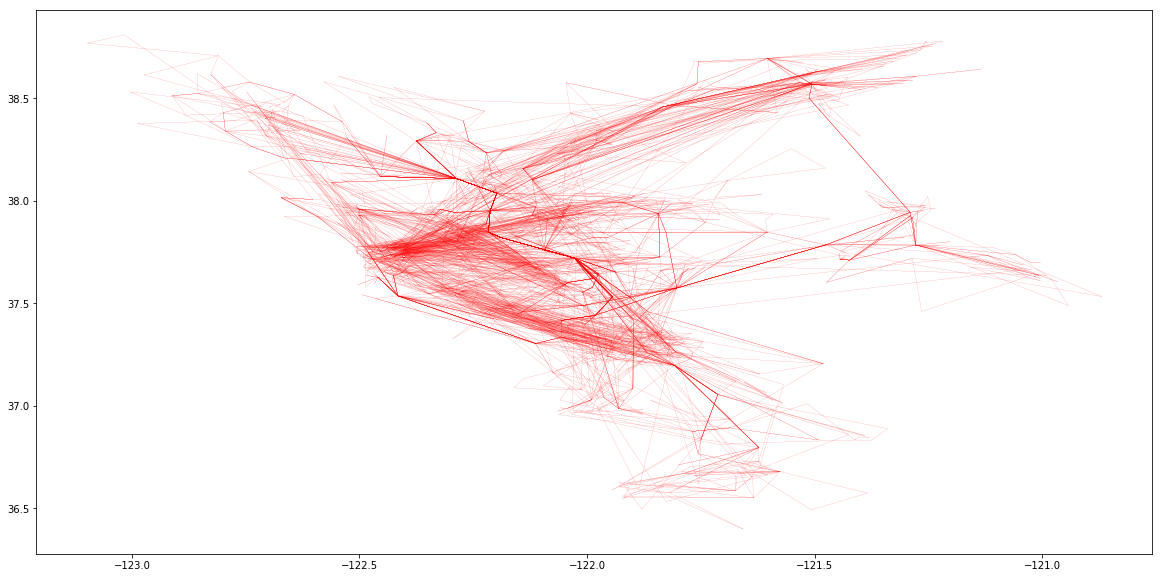

In [125]:
# Plot the trajectory that Santa has to travel with Shortest Path!

x = [g.vs[path_trimmed_sp[0][0]]['coors'][0]]
y = [g.vs[path_trimmed_sp[0][0]]['coors'][1]]

for (v1,v2) in path_trimmed_sp:
    x.append(g.vs[v2]['coors'][0])
    y.append(g.vs[v2]['coors'][1])

plt.figure(figsize=(20,10))
for i in range(0,len(x)-1):
    plt.plot(x[i:i+2],y[i:i+2], 'ro-', linewidth=0.1, ms=0)

plt.show()

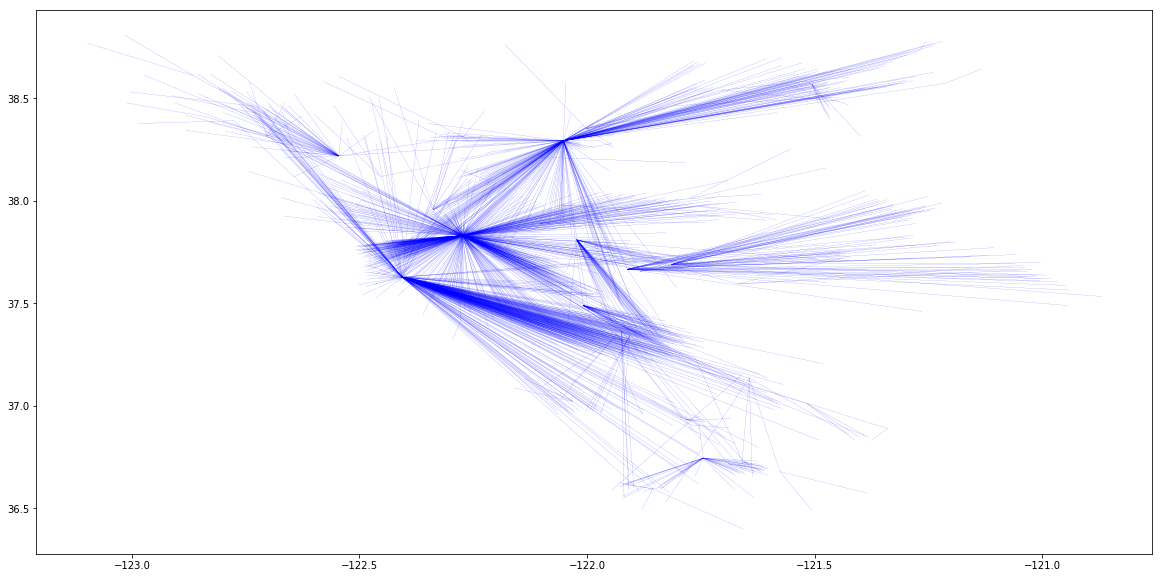

In [126]:
# Printing the MST
plt.figure(figsize=(20,10))

for (v1, v2) in mst.get_edgelist():
    x1,y1 = mst.vs[v1]['coors']
    x2,y2 = mst.vs[v2]['coors']
    plt.plot([x1, x2],[y1, y2], 'bo-', linewidth=0.1, ms=0)
plt.show()

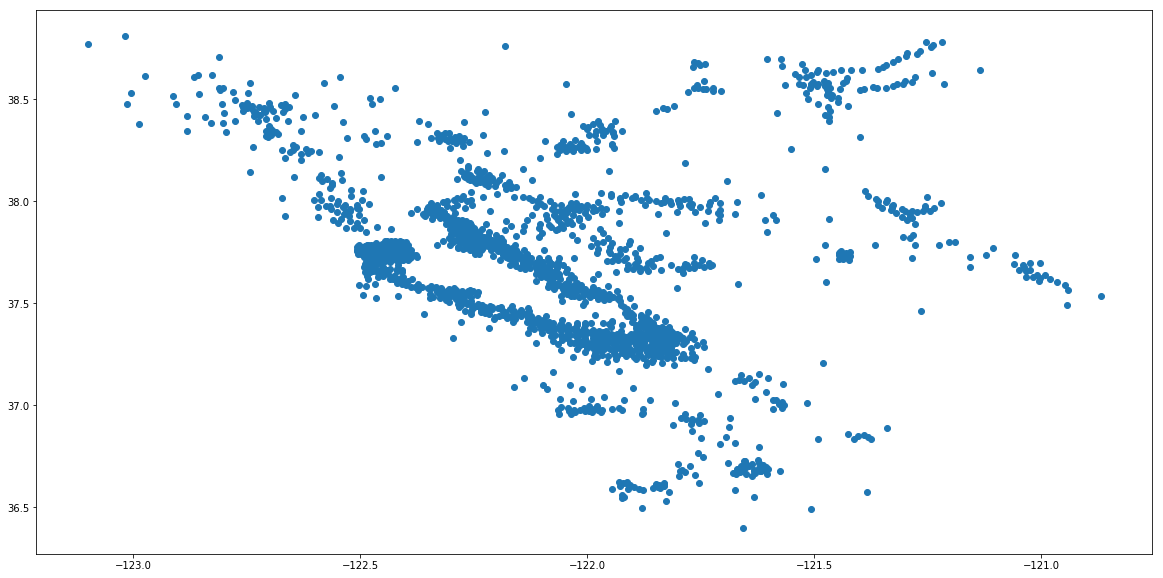

In [47]:
x = []
y= []
for v in g.vs:
    x.append(v['coors'][0])
    y.append(v['coors'][1])
    
plt.figure(figsize=(20,10))
plt.scatter(x,y)